---

## Exercise: Linear Dependence and Rank of a Matrix

**Understanding Linear Dependence in Matrices**

In the context of a matrix, **linear dependence** refers to a situation where one or more columns (or rows) can be written as a linear combination of other columns (or rows). If all columns (or rows) are linearly independent, no such relationship exists.

A set of column vectors $ \mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_n $ in $ \mathbb{R}^m $ is **linearly dependent** if there exist scalars $ c_1, c_2, \dots, c_n $, **not all zero**, such that:

$$
c_1 \mathbf{v}_1 + c_2 \mathbf{v}_2 + \dots + c_n \mathbf{v}_n = \mathbf{0}
$$

Equivalently, a matrix $ A $ with columns $ \mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_n $ is **linearly dependent** if there is a nontrivial solution to:

$$
A \mathbf{c} = \mathbf{0}
$$

where $ A = [\mathbf{v}_1 \, \mathbf{v}_2 \, \dots \, \mathbf{v}_n] $ and $ \mathbf{c} \neq \mathbf{0} $.

One way to determine if a set of vectors (columns or rows) is linearly dependent is by checking the **rank** of the matrix.

- The **rank** of a matrix $ A $ is the number of **linearly independent** columns (or rows).
- If $ \text{rank}(A) = n $ (the number of columns), the columns are **linearly independent**.
- If $ \text{rank}(A) < n $, then at least one column can be written as a linear combination of the others, meaning the columns are **linearly dependent**.

To compute the rank of a matrix, we can transform it into **Row Echelon Form (REF)** using **Gaussian Elimination**. The number of nonzero rows in REF corresponds to the rank:

$$
\text{rank}(A) = \text{number of nonzero rows in REF}
$$

If $ \text{rank}(A) < n $, the matrix has **linearly dependent columns**.


---

#### **Task: Implement Rank Calculation Using Gaussian Elimination**
Your goal is to implement a function that determines the rank of a matrix using Gaussian Elimination, without relying on external libraries (like NumPy or SciPy). 
Then, using your function, determine whether the given matrices are linearly independent.

### **Instructions**
1. Implement the function `rank_of_matrix(matrix: list[list[float]]) -> int` that:
   - Takes a matrix as a list of lists.
   - Performs Gaussian elimination to convert it into row echelon form.
   - Returns the rank (i.e., the number of nonzero rows in the echelon form).

2. Use your function to determine if the following matrices have **linearly independent columns**.

### **Example Matrices**
```python
matrix1 = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

matrix2 = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]

matrix3 = [
    [1, 2, 3, 4],
    [4, 5, 6, 7],
    [7, 8, 9, 10],
    [1, 1, 1, 1]
]

In [8]:
def swap_rows(matrix, i, j):
    """Swaps two rows of a mtrix"""

    matrix[i], matrix[j] = matrix[j], matrix[i]

def get_nonzero_row(matrix, pivot, col, row_number):
    """Looks for the leftmost non-zero row of a matrix"""
    
    for row in range(pivot, row_number): # We will loop through each row and check it for having a non-zero pivot
        if matrix[row][col] != 0:
            return row
    return -1

    
def rank_matrix(matrix):
    """Returns the rank of a matrix using Gaussian elimination."""
    rank = 0
    n = len(matrix) # Number of rows
    m = len(matrix[0]) # Number of columns
    pivot = 0 # Let's set our pivot row to 0 for the beginning

    # Looking for non-zero rows
    for col in range(m):
        nonzero = get_nonzero_row(matrix, pivot, col, n)
        if nonzero != -1:
            swap_rows(matrix, nonzero, pivot)
            
            # Let's set the first-entry of a pivot row to 1
            pivot_element = matrix[pivot][col]
            for col_i in range(col, m):
                matrix[pivot][col_i] /= pivot_element
                
            # Let's set all the entries below the pivot to zeros
            for row_i in range(pivot + 1, n):
                k = matrix[row_i][col]
                for col_i in range(col, m):
                    matrix[row_i][col_i] -= k * matrix[pivot][col_i]
            
            pivot += 1

    for row in range(n):
        if matrix[row] != [0] * m:
            rank += 1

    return rank

matrix1 = [[1, 2, 3], 
           [4, 5, 6], 
           [7, 8, 10]]

print("Rank of matrix1:", rank_matrix(matrix1))

matrix2 = [[1, 2, 3], 
           [2, 4, 6], 
           [3, 6, 9]]
print("Rank of matrix2:", rank_matrix(matrix2))

matrix3 = [
    [1, 2, 3, 4],
    [4, 5, 6, 7],
    [7, 8, 9, 10],
    [1, 1, 1, 1]
]
print("Rank of matrix3:", rank_matrix(matrix3))

Rank of matrix1: 3
Rank of matrix2: 1
Rank of matrix3: 2


## Exercise: Coding tasks

Consider the following dataset

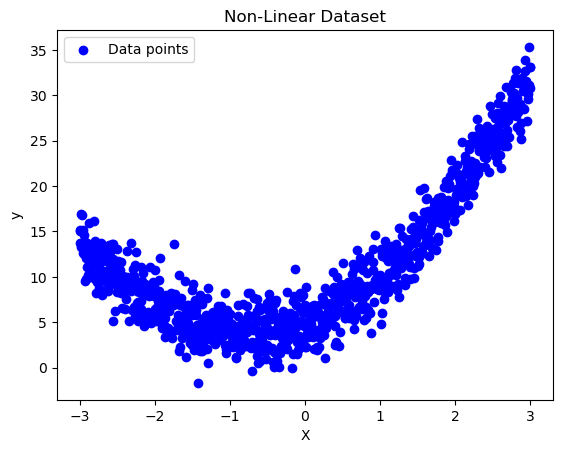

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)

X = np.linspace(-3, 3, 1_000).reshape(-1, 1)
y = 2 * X**2 + 3 * X + 5 + np.random.normal(0, 2, X.shape)


plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-Linear Dataset')
plt.legend()
plt.show()


### **Step 1**

You should implement a custom regression class using the template below that does the following:
- Parameters: Accepts a flag to include a constant (intercept) or not.
- Fit: Estimate the OLS parameters using the formulas
$$\widehat a = \frac{\sum\limits_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum\limits_{i=1}^n (x_i - \bar{x})^2}, \quad 
    \widehat b = \bar{y} - \widehat a \bar{x}.$$
- Predict: Compute predictions using the estimated parameters.
- Residuals: Return the residuals, defined as:
$$ residuals = y − \widehat y $$

In [12]:
class CustomLinearRegression:
    """Custom Linear Regression Class."""
    
    def __init__(self, use_intercept=True):
        """Function to initialize the model."""
    
        self.use_intercept = use_intercept
        self.coef_ = None
        self.intercept_ = 0
    
    def fit(self, X, y):
        """Function to fit the model."""
        
        x_mean = np.mean(X) # Calculate the mean value for X
        y_mean = np.mean(y) # Calculate the mean value for y
        
        num_sum = 0 # Variable to store the result in numerator of coefficient

        # Calculating the covariance between x and y 
        for x_i, y_i in zip(X, y):
            num_sum += (x_i - x_mean) * (y_i - y_mean)

        denum_sum = 0 # Variable to store the result in denumerator of coefficient

        # Calculating the variance for x
        for x_i in X:
            denum_sum += (x_i - x_mean) ** 2
    
        self.coef_ = num_sum / denum_sum # Final result for the coefficient
        self.intercept_ = y_mean - self.coef_ * x_mean # Final result for the intercept

    
    def predict(self, X):
        """Function to make predictions."""

        return self.coef_ * X + self.intercept_

    
    def residuals(self, X, y):
        """Function to return residuals."""
        
        y_hat = self.predict(X)
        return y - y_hat

### Step 2
- Split the dataset into training and testing sets
- Use your custom linear regression class to fit the model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True) # Split the data

# Fitting the model
model = CustomLinearRegression()
model.fit(X_train, y_train)

### Step 3
- Compute predictions for the test data.

In [20]:
# Computing predictions
y_test_pred = model.predict(X_test)

### Step 4

- Plot the actual data points and overlay the regression line from your custom model.

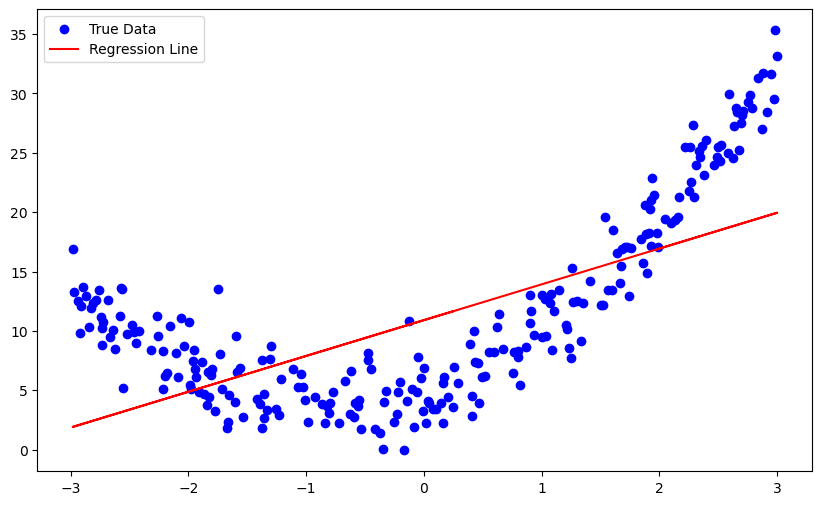

In [22]:
# Define the size of a plot
plt.figure(figsize=(10, 6))

# Plot the real values
plt.scatter(X_test, y_test, color="blue", label="True Data")
# Plot the regression line
plt.plot(X_test, y_test_pred, color="red", label="Regression Line")

plt.legend()
plt.show()

<!-- ### Step 5 -->
- Create a plot of residuals 
- Are the residuals randomly dispersed around zero?
- What does the pattern (or lack thereof) tell you about the appropriateness of a linear model for this dataset?

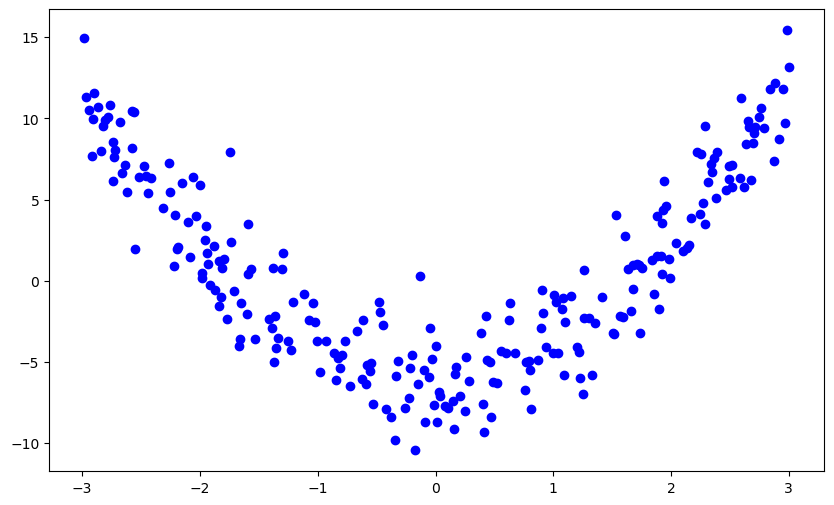

In [24]:
# Get the residuals
residuals = model.residuals(X_test, y_test)

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(X_test, residuals, color="blue")

plt.show()

# The residuals are not scattered randomly, there is a strong u-pattern. 
# It indicates that the relationship between x and y may be non-linear or there are outliers in the data.
# Thus, the linear model is not appropriate for the data set.

### Step 6

- Use sklearn to implement Polynomial Regression and fit it on the same dataset.
- Compare the results.

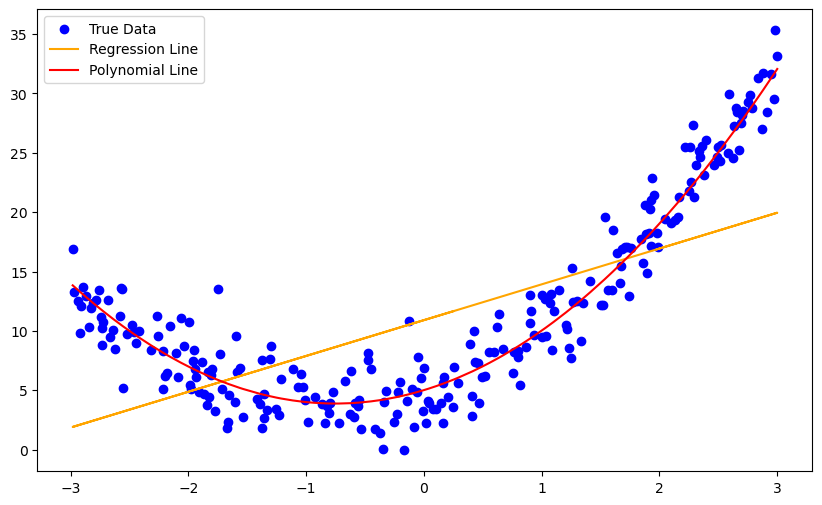

In [26]:
# Let's set polynomial dregree equal to 2
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features_train = poly.fit_transform(X_train)
poly_features_test = poly.fit_transform(X_test)

# Initializing and fitting the model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features_train, y_train)

# Making predicitons on test data
poly_y_test_pred = poly_reg_model.predict(poly_features_test)

# Sort the x and y values for a better representation of a curve
X_test_sorted, poly_y_test_sorted = zip(*sorted(zip(X_test.ravel(), poly_y_test_pred)))

# Define the size of a plot
plt.figure(figsize=(10, 6))

# Plot the real values
plt.scatter(X_test, y_test, color="blue", label="True Data")
# Plot the regression line
plt.plot(X_test, y_test_pred, color="orange", label="Regression Line")
# Plot the Polynomial regression
plt.plot(X_test_sorted, poly_y_test_sorted, color="red", label="Polynomial Line")
plt.legend()
plt.show()



### Final Discussion

- Discuss how the linear model may underfit the data because it cannot capture the inherent non-linear relationships
- Explain how introducing polynomial terms leads to a better fit

### Final Discussion

The residual plot suggests a quadratic relationship between x and y, which can not be represented by a linear model. It misses most of the relationship's pattern and makes significant deviations from the actual data set, resulting errors.
In contrast, polynomial of degree 2 can represent quadrtic relationship vividly and generalize it. Higher degree would lead to overfitting and sensitivity to outliers in data. 